In [125]:
## Importing the necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns 



In [119]:
df= pd.read_csv('M1_final.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [105]:
## Defining the columns
x = df.iloc[:,22].values.reshape(-1,1)
y = df.iloc[:,6]. values.reshape(-1,1)

In [71]:
## Train our Linear Regression Model
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [106]:
## Make prediction on the trained model 
y_pred = LR.predict(x)
y_pred

array([[ 7.05905794],
       [ 7.47812584],
       [10.4116012 ],
       ...,
       [ 9.99253329],
       [ 6.63999003],
       [ 7.47812584]])

In [109]:
## put ypred outcomes in a readable form
pred = pd.DataFrame({'Actual_TAXI_OUT':y.flatten(), 'Predicted_TAX_OUT':y_pred.flatten()})
pred

,Actual_TAXI_OUT,Predicted_TAX_OUT
0,-1,7.059058
1,-7,7.478126
2,40,10.411601
3,-2,6.220922
4,-4,6.639990
...,...,...
28815,2,9.154397
28816,2,10.411601
28817,283,9.992533
28818,5,6.639990


<function matplotlib.pyplot.show(close=None, block=None)>

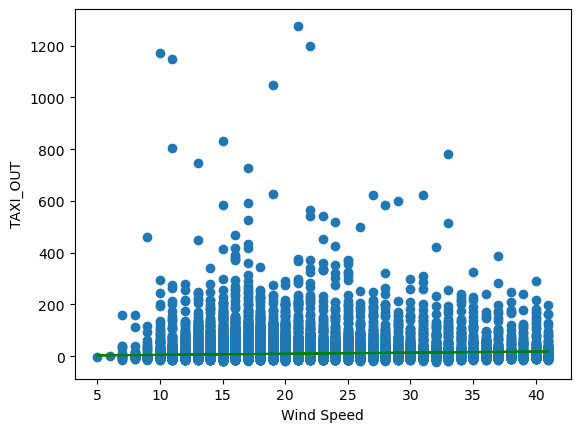

In [110]:
## visualise the oucomes 

plt.scatter (x,y)
plt.plot(x,y_pred, color = 'green')
plt.xlabel('Wind Speed')
plt.ylabel('TAXI_OUT')
plt.show

In [104]:
## Filtering the data to be more specific by covering one destination to be San Fransisco
new_df= df.loc[(df['DEST'].str.contains('SFO'))]
new_df.to_csv('filtered_M1.csv')
new_df.reset_index(drop=True, inplace=True)
new_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N967JT,SFO,-3,388,2586,410,...,32,58,W,24,35,29.91,Fair / Windy,17,21,17
1,11,1,5,DL,N703TW,SFO,-6,391,2586,420,...,33,59,W,24,29,30.00,Fair / Windy,17,21,16
2,11,1,5,AA,N115NN,SFO,-3,386,2586,420,...,33,59,W,24,29,30.00,Fair / Windy,17,21,18
3,11,1,5,DL,N712TW,SFO,-7,400,2586,490,...,33,52,W,21,30,30.00,Fair / Windy,46,19,28
4,11,1,5,B6,N969JT,SFO,-3,397,2586,562,...,32,47,WNW,25,32,30.02,Fair / Windy,30,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1,31,5,AA,N116AN,SFO,0,415,2586,1080,...,36,86,E,8,0,30.24,Cloudy,41,37,16
1674,1,31,5,DL,N624AG,SFO,15,424,2586,1165,...,37,89,ENE,7,0,30.22,Cloudy,40,31,27
1675,1,31,5,B6,N989JT,SFO,-3,410,2586,1229,...,37,89,ENE,7,0,30.22,Cloudy,30,36,26
1676,1,31,5,B6,N993JE,SFO,-7,402,2586,1309,...,38,93,CALM,0,0,30.22,Cloudy,30,29,18


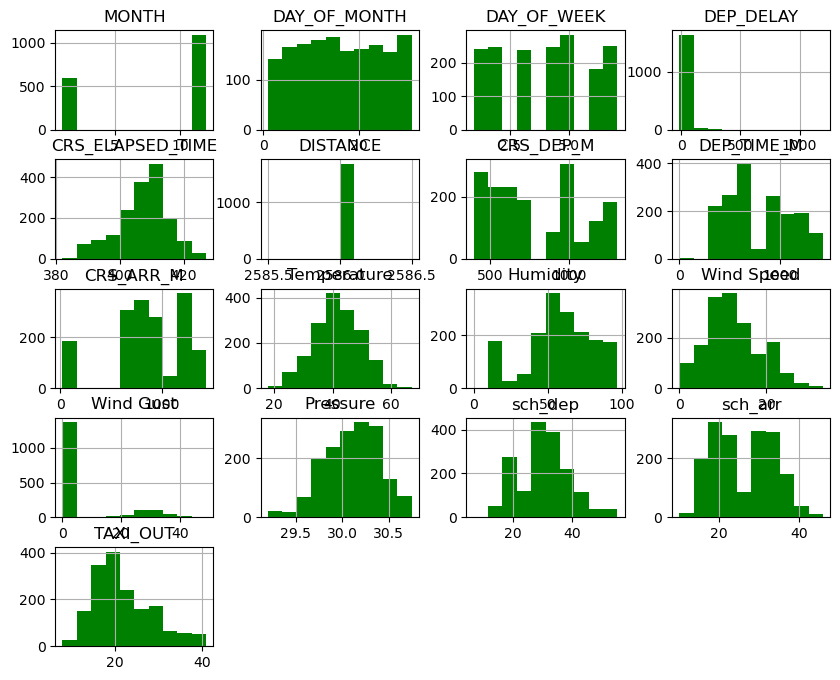

In [134]:
new_df.hist(figsize=(10,8), color= 'green')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

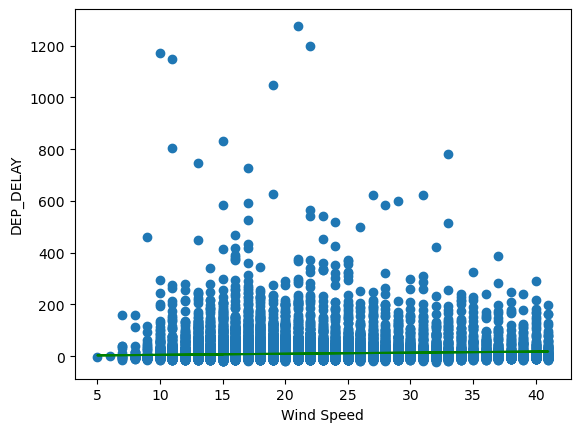

In [135]:
## visualise the oucomes of the correlation between the Wind Speed and the Departure Delay

plt.scatter (x,y)
plt.plot(x,y_pred, color = 'green')
plt.xlabel('Wind Speed')
plt.ylabel('DEP_DELAY')
plt.show

In [74]:
## usind lasso and ridge models to make predictions and see whichever makes sense 
## Define our models
model_lasso = Lasso(alpha=0.01)
model_ridge = Ridge(alpha=0.01)

In [75]:
## fit the model 
model_lasso.fit(x,y)
model_ridge.fit(x,y)

Ridge(alpha=0.01)

In [76]:
Pred_lasso = model_lasso.predict(x)
pred_ridge = model_ridge.predict(x)

In [77]:
## make the above prediction in a dataframe 
lasso_df = pd.DataFrame({'Actual_DEP_DELAY':y.flatten(), 'Predicted_DEP_DELAY':Pred_lasso.flatten()})
lasso_df

,Actual_DEP_DELAY,Predicted_DEP_DELAY
0,-1,11.665581
1,-7,11.665581
2,40,11.665581
3,-2,11.665581
4,-4,11.246768
...,...,...
28815,2,3.708140
28816,2,3.708140
28817,283,3.708140
28818,5,3.708140


In [78]:
ridge_df = pd.DataFrame({'Actual_DEP_DELAY':y.flatten(), 'Predicted_DEP_DELAY':pred_ridge.flatten()})
ridge_df

,Actual_DEP_DELAY,Predicted_DEP_DELAY
0,-1,11.668805
1,-7,11.668805
2,40,11.668805
3,-2,11.668805
4,-4,11.249737
...,...,...
28815,2,3.706515
28816,2,3.706515
28817,283,3.706515
28818,5,3.706515


In [140]:
## using train test and split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=200,random_state=70)

In [141]:
## create naive bayes
gaussian_model= GaussianNB()

## train the above gaussian model
gaussian_model.fit(x_train,y_train)


/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [142]:
## Make our predictions according to the implemented model above
predictions= gaussian_model.predict(x_test)

In [143]:
predictions

array([161, 231, 204, 232, 160,   0, 145, -22, 599, 164, 262, 332,   0,
       145, 175, 213, 145, 303, 178, 252, 187, 145, 262, 258, 231, 231,
       213, 263, 204, 145, -22, 231, 231, 178, 164, 175, 326, 160, 247,
       187, 204, 332, 175,   0, 145, 213, 161, 231, 262, 231, 293, 247,
       145, 247, 231, 231, 204, 293, 332, 178, 187, 232, 175, 218, 258,
         0, 160, 303, 161, 164, 145, 187, 332, 204, 303, 164, 232, 218,
       231, 599, 232, 213, 161, 247, 262, 164, 599, 231, 178, 281, 247,
       160, 204, 187, 187, 145, 175, 160, 281, 252, 258, 231, 252, 164,
       231, 145, 160, 303, 160, 252, 204,   0, 218, 332, 258, 161, 247,
       263, 204, 262, 160, 599, 262, 231, 160, 145, 204, -22, 252, 213,
       232, 204, 213, 160, 145, 281, 231, 161,  -5, 204, 179, 160, 175,
       145, 145, 145, 213,   0, 232, 231, 247, 281, 145, 218, 160, 161,
       232, 187, 231, 204, 164, 303, 247, 258, 160, 599, 161, 187, 160,
       231, 218, 599, 332, 161, 252, 160, 187, 213, 161, 175, 14

In [146]:
## get the results in a dataframe
result= pd.DataFrame({'Actual_DEP_DELAY':y_test.flatten(),'predicted_DEP_DELAY':predictions.flatten()})
result

,Actual_DEP_DELAY,predicted_DEP_DELAY
0,-6,161
1,2,231
2,-2,204
3,95,232
4,-6,160
...,...,...
195,-1,164
196,-5,175
197,-4,213
198,-5,187


In [149]:
## Accuracy

print ('Accuracy:',metrics.accuracy_score(x_test,predictions))

Accuracy: 0.0


In [ ]:
## after using the Gaussian Model and testing and training our models the predictions came uo with a 0.0 accuracy and this maybe because one of the following reasons.
# Data are not accurate, quality reason, Models i have used are not suitable for the task, or maybe the model is overfitting the training data.
## 